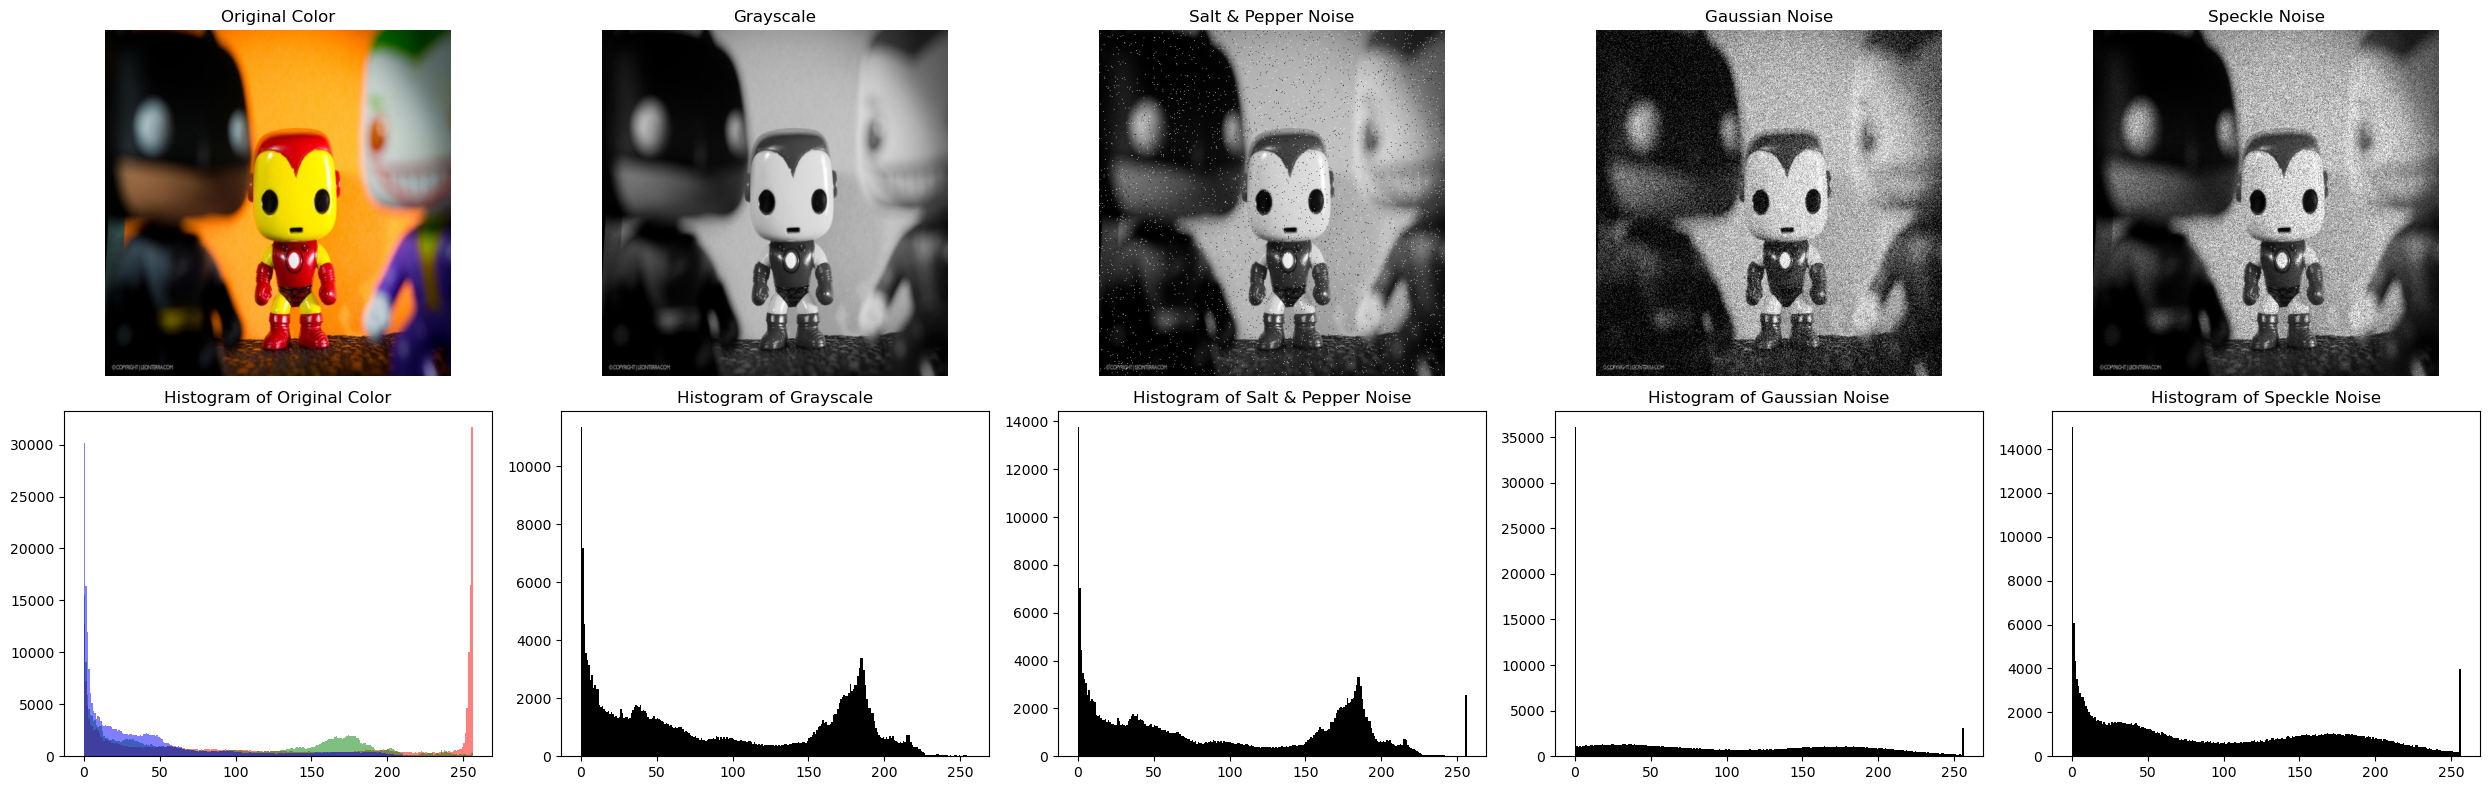

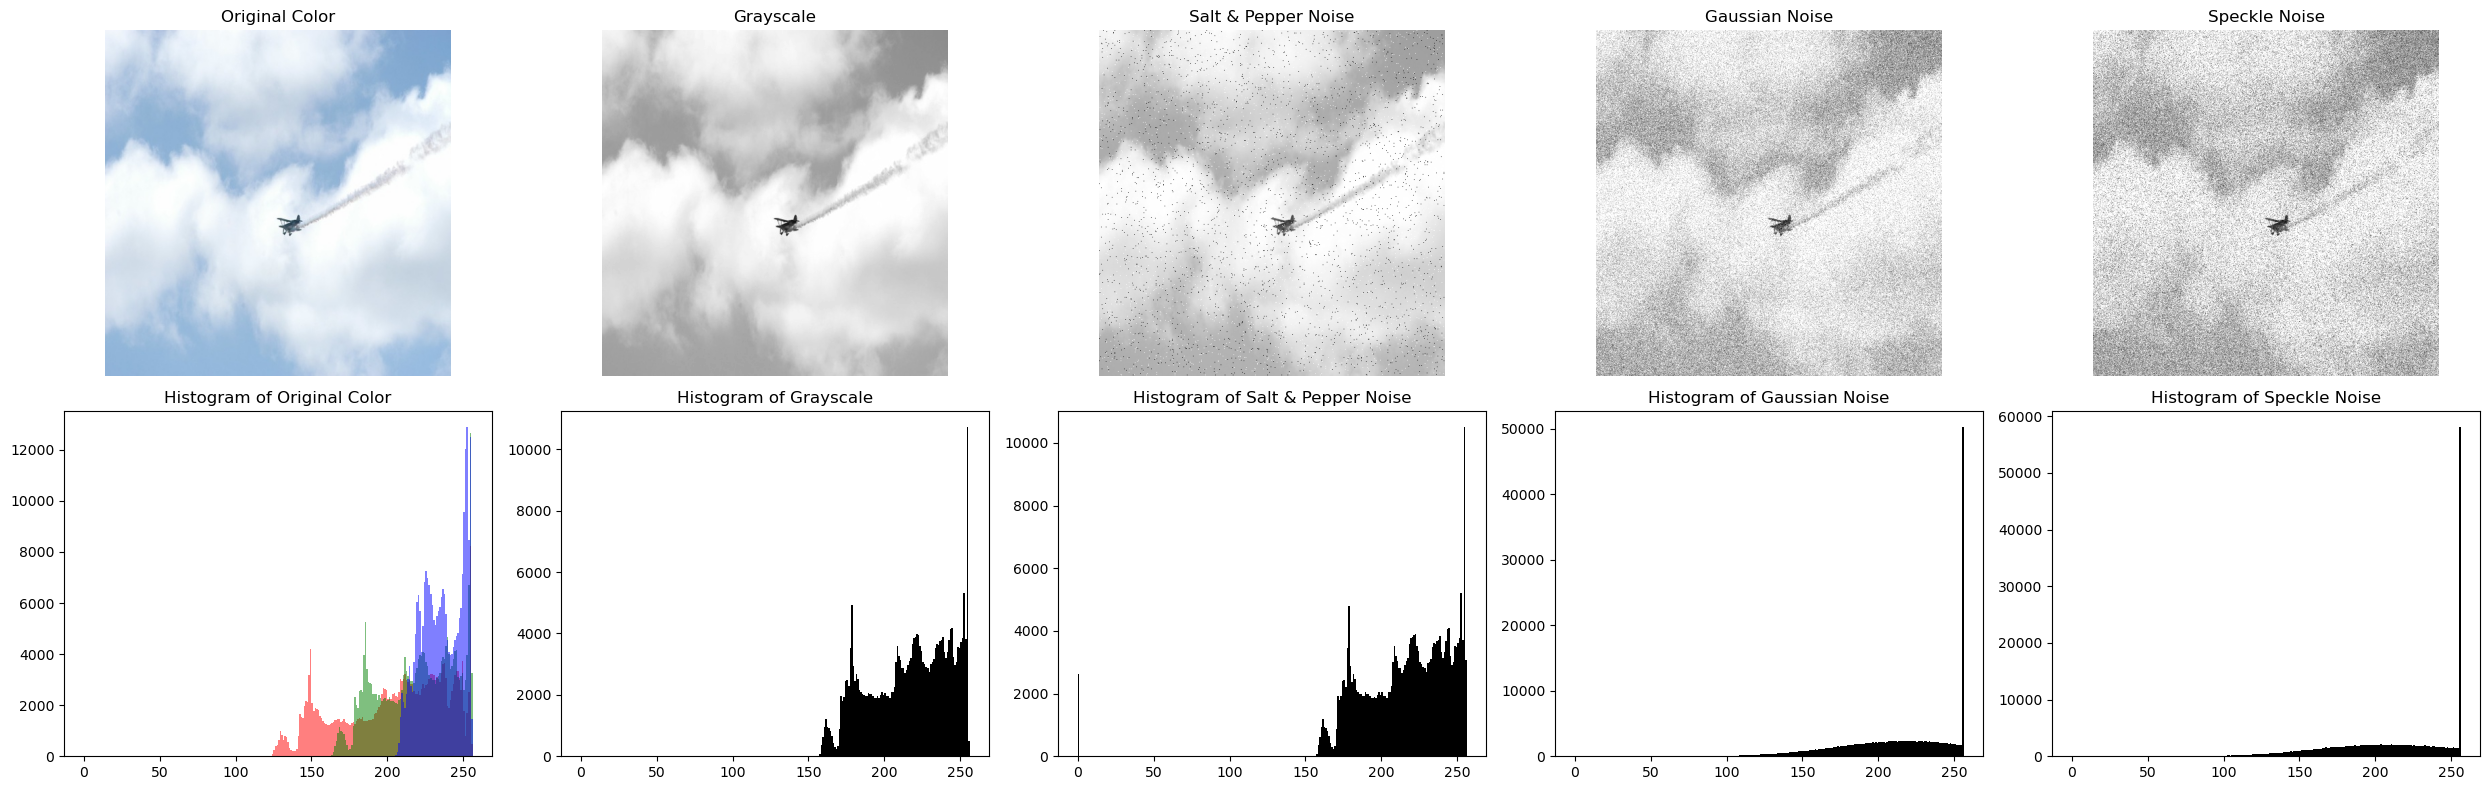

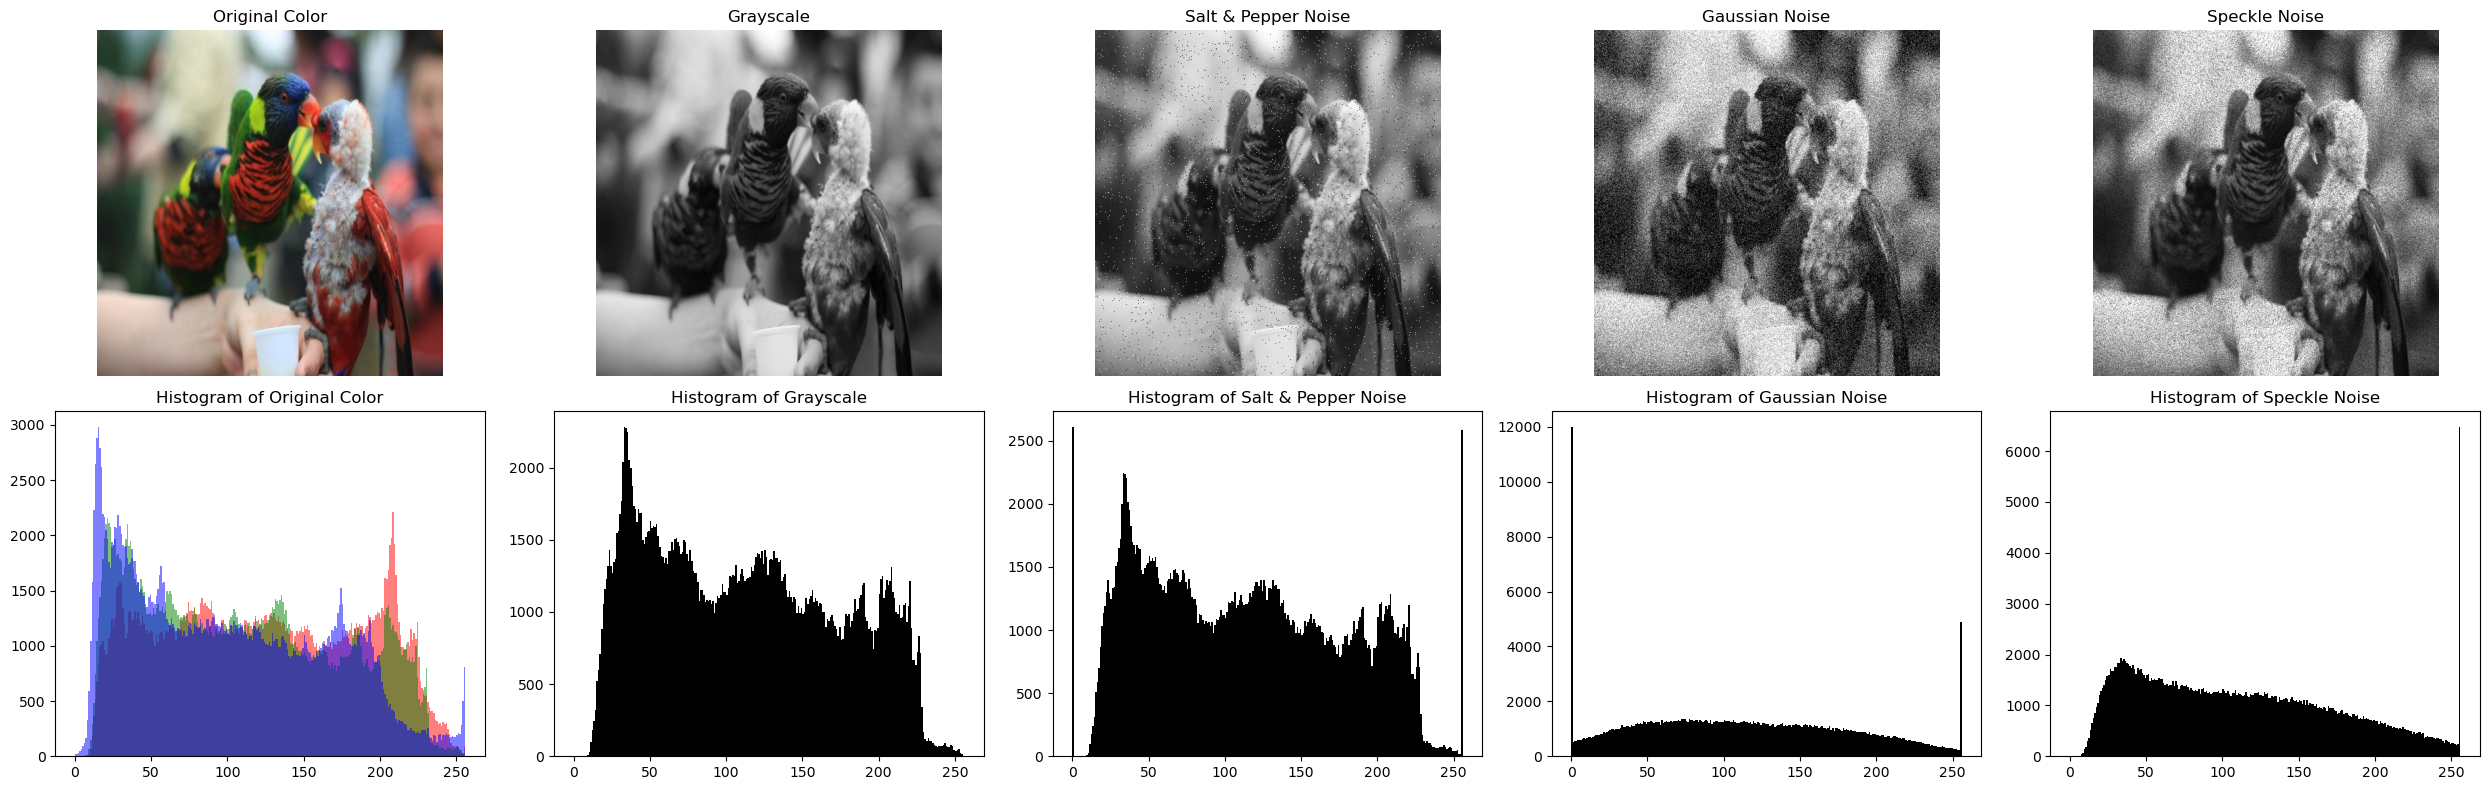

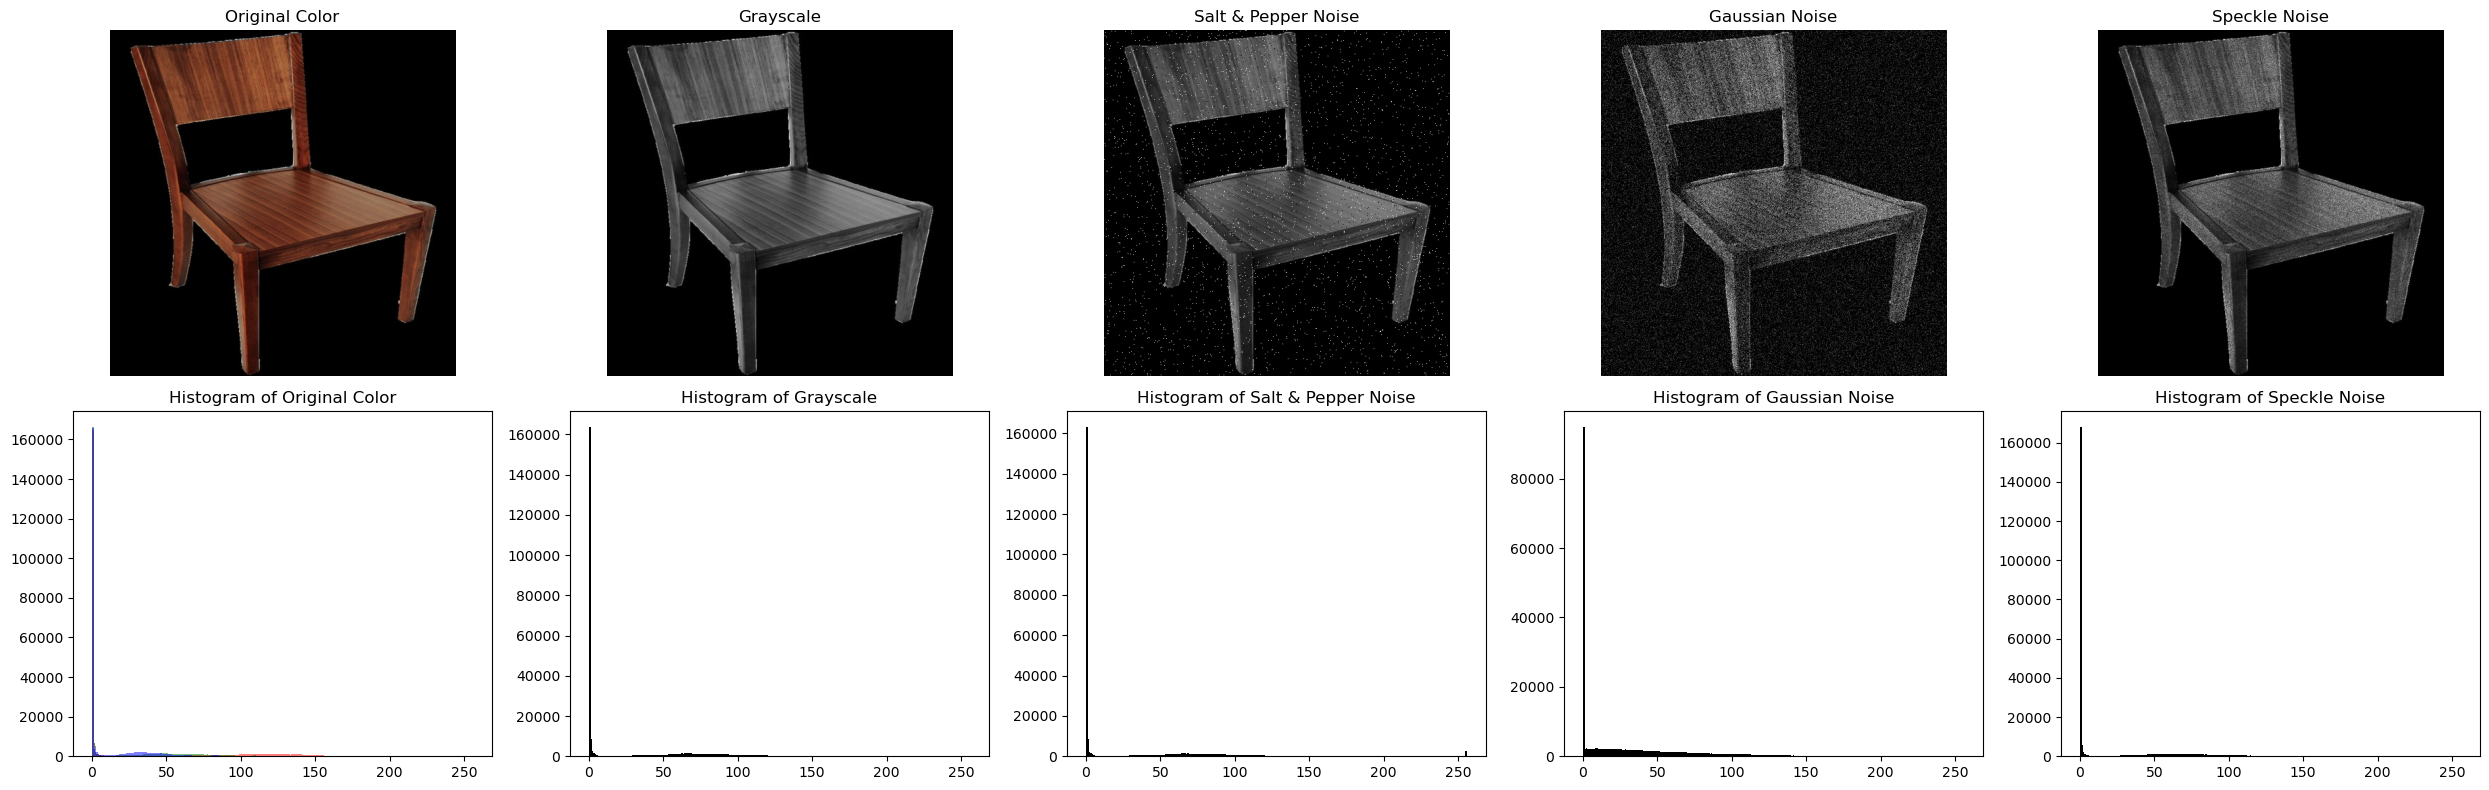

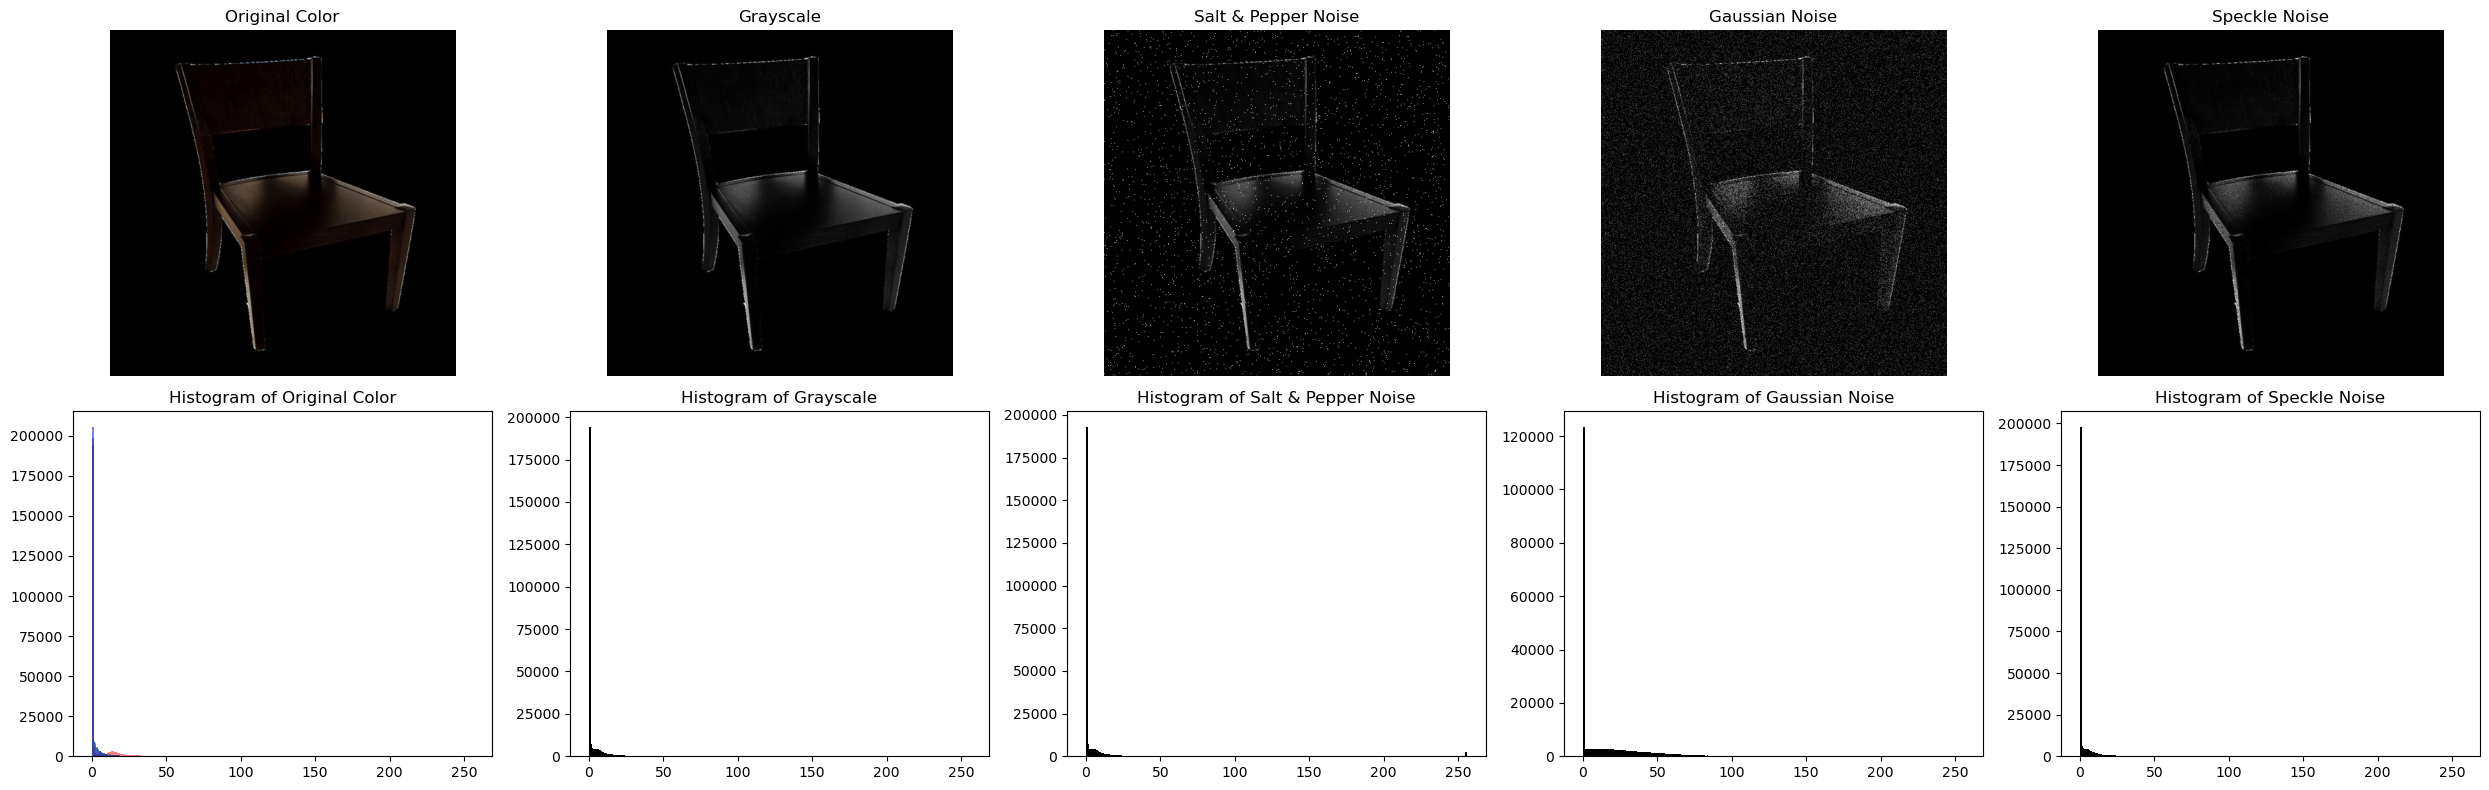

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random

INPUT_DIR = r"C:\Users\jayja\Desktop\Images 3"   

def add_salt_and_pepper_noise(img, salt_prob=0.01, pepper_prob=0.01):
    noisy = img.copy()
    num_salt = np.ceil(salt_prob * img.size).astype(int)
    num_pepper = np.ceil(pepper_prob * img.size).astype(int)
    coords = [np.random.randint(0, i - 1, num_salt) for i in img.shape]
    noisy[tuple(coords)] = 255
    coords = [np.random.randint(0, i - 1, num_pepper) for i in img.shape]
    noisy[tuple(coords)] = 0
    return noisy

def add_gaussian_noise(img, mean=0, std_dev=35):
    noise = np.random.normal(mean, std_dev, img.shape)
    noisy_img = img.astype(np.float32) + noise
    noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)
    return noisy_img

def add_speckle_noise(img, variance=0.2):
    noise = np.random.normal(0, variance, img.shape)
    noisy_img = img + img * noise
    noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)
    return noisy_img

def show_all(color_img, gray_img, noises, titles):
    n = len(noises) + 2
    fig, axes = plt.subplots(2, n, figsize=(5*n, 8))
    all_images = [color_img, gray_img] + noises
    
    for i in range(n):
        img = all_images[i]
        title = titles[i]
        cmap = 'gray' if len(img.shape) == 2 else None
        axes[0, i].imshow(img, cmap=cmap)
        axes[0, i].set_title(title)
        axes[0, i].axis('off')
        if len(img.shape) == 3:
            colors = ('r', 'g', 'b')
            for j, c in enumerate(colors):
                axes[1, i].hist(img[:, :, j].ravel(), bins=256, range=[0, 256], color=c, alpha=0.5)
        else:
            axes[1, i].hist(img.ravel(), bins=256, range=[0, 256], color='black')
        axes[1, i].set_title(f"Histogram of {title}")
    plt.tight_layout()
    plt.show()

for file in os.listdir(INPUT_DIR):
    if file.lower().endswith(('.jpg', '.png', '.jpeg', '.bmp')):
        path = os.path.join(INPUT_DIR, file)
        color_img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
        gray_img = cv2.cvtColor(color_img, cv2.COLOR_RGB2GRAY)
        sp_noisy = add_salt_and_pepper_noise(gray_img)
        gauss_noisy = add_gaussian_noise(gray_img)
        speckle_noisy = add_speckle_noise(gray_img)
        show_all(
            color_img=color_img,
            gray_img=gray_img,
            noises=[sp_noisy, gauss_noisy, speckle_noisy],
            titles=["Original Color", "Grayscale", "Salt & Pepper Noise", "Gaussian Noise", "Speckle Noise"]
        )
